In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel('athlete_events.xlsx')

In [2]:
#We only need Kazakhstan's data in this EDA
kz_df = df[df['Team'] == 'Kazakhstan']
kz_df.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Region,Games,Year,Season,City,Sport,Event,Medal
492,272,Berik Abdrakhmanov,M,30.0,165.0,60.0,Kazakhstan,KAZ,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,NaN
766,439,Sagat Abikeyeva,F,27.0,160.0,78.0,Kazakhstan,KAZ,Kazakhstan,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Half-Heavyweight,NaN
1068,599,Bektas Abubakirov,M,23.0,165.0,54.0,Kazakhstan,KAZ,Kazakhstan,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Bantamweight,NaN
1107,620,Kanat Kalizhanovich Abutalipov,M,25.0,168.0,56.0,Kazakhstan,KAZ,Kazakhstan,2008 Summer,2008,Summer,Beijing,Boxing,Boxing Men's Bantamweight,NaN
1108,620,Kanat Kalizhanovich Abutalipov,M,29.0,168.0,56.0,Kazakhstan,KAZ,Kazakhstan,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Bantamweight,NaN


In [22]:
#Check how many records do we have
kz_df.shape

(1429, 16)

In [12]:
#Check missing Values distribution
print(kz_df.isnull().sum())

ID           0
Name         0
Sex          0
Age          0
Height      74
Weight      80
Team         0
NOC          0
Region       0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     1352
dtype: int64


In [176]:
#Check Data Types
kz_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Region     object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [15]:
# Drop duplicate records
kz_df.drop_duplicates(subset=['Name', 'Sex', 'Team', 'Games', 'Year', 'Season', 'Event'])


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Region,Games,Year,Season,City,Sport,Event,Medal
492,272,Berik Abdrakhmanov,M,30.0,165.0,60.0,Kazakhstan,KAZ,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,NaN
23539,12378,Olga Yevgenyevna Bludova-Safronova,F,24.0,171.0,62.0,Kazakhstan,KAZ,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
117034,59264,Timur Khaydarov,M,20.0,185.0,86.0,Kazakhstan,KAZ,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",NaN
117035,59264,Timur Khaydarov,M,20.0,185.0,86.0,Kazakhstan,KAZ,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",NaN
117554,59492,Vitaly Khudyakov,M,21.0,186.0,83.0,Kazakhstan,KAZ,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 10 kilometres Open Water,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149455,74959,Sergey Margatsky,M,28.0,NaN,NaN,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
115067,58286,Dmitry Kazarlyga,M,22.0,179.0,71.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Figure Skating,Figure Skating Mixed Ice Dancing,NaN
209360,105116,Yevgeny Leonidovich Sanarov,M,22.0,185.0,77.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Men's 10,000 metres",NaN
181338,91139,Dmitry Anatolyevich Pantov,M,24.0,190.0,85.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Men's 20 kilometres,NaN


In [16]:
#No duplicates detected
kz_df.shape

(1429, 16)

In [25]:
#One athlete can participate in many Olympic Games Events
#How many unique athletes do we have?
unique_athletes_count = kz_df['Name'].nunique()
unique_athletes_count

694

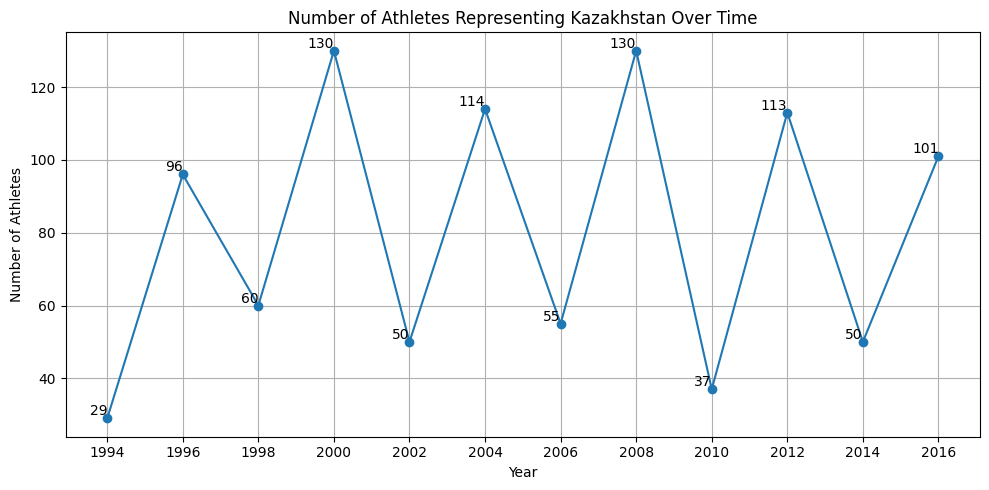

In [142]:
#Plot the number of athletes representing Kazakhstan over time

# Drop duplicate athletes for each year
kz_athletes_unique = kz_df.drop_duplicates(subset=['Year', 'Name'])

# Count the unique occurrences of each year
year_counts = kz_athletes_unique['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker='o')

# Annotate each data point with the number of athletes
for year, count in zip(year_counts.index, year_counts.values):
    plt.text(year, count, str(count), ha='right', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes Representing Kazakhstan Over Time')

# Show the plot
plt.grid(True)
#We want to see all years with Olympic Games available
plt.xticks(year_counts.index[::1])
plt.show()

In [149]:
participants = kz_df.groupby('Sport').size().reset_index(name='Participants')
participants.columns

Index(['Sport', 'Participants'], dtype='object')

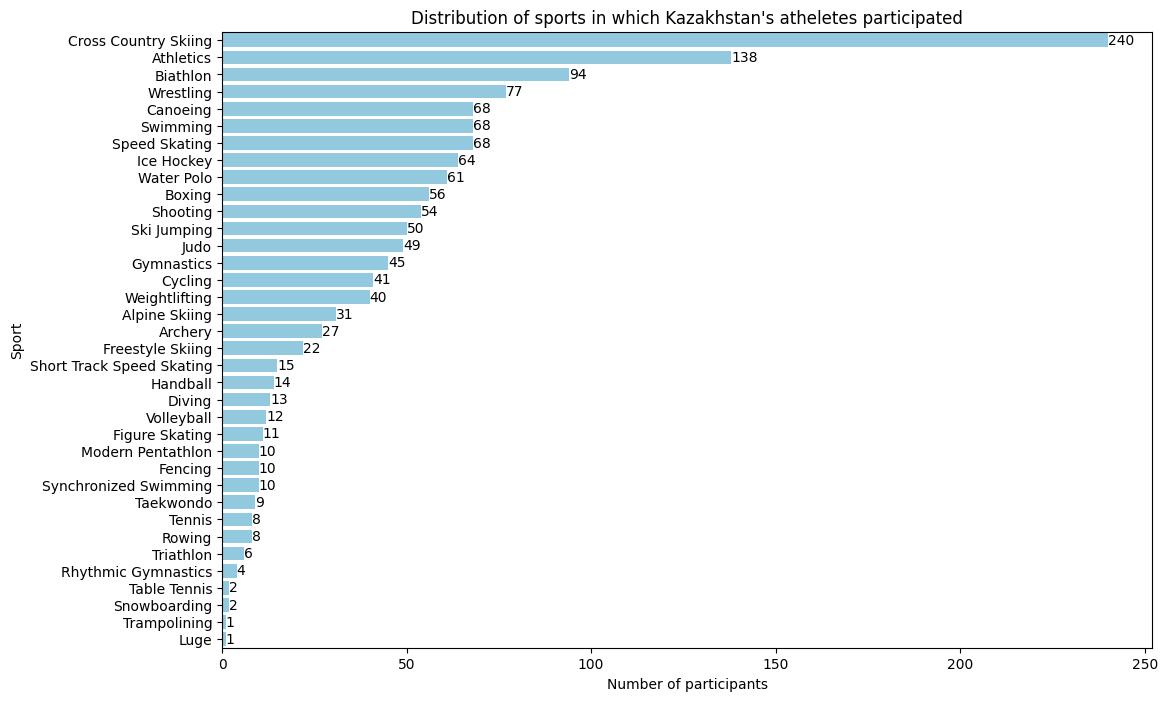

In [150]:
#Distribution of sports in which Kazakhstan's athletes participate:

# Group by sport and count the number of participants 
participants = kz_df.groupby('Sport').size().reset_index(name='Participants')

#Sort by the num. of participants in descdending order
participants=participants.sort_values(by='Participants',ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Participants', y='Sport', data=participants, color='skyblue')
plt.xlabel("Number of participants")

#Annotate each bar chart with the data value

plt.title("Distribution of sports in which Kazakhstan's atheletes participated")
for index, value in enumerate(participants['Participants']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.show()

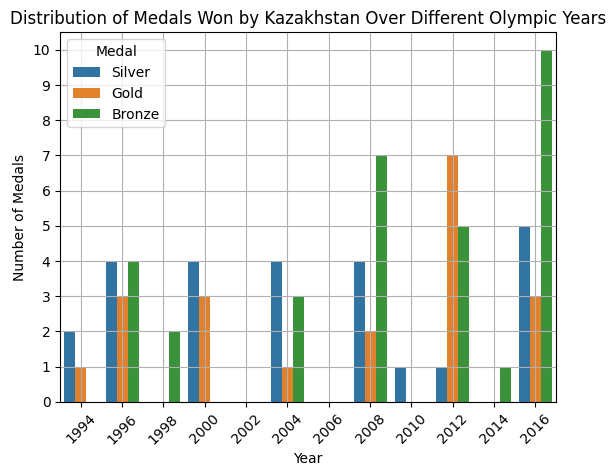

In [151]:
#Visualize the distribution of medals won by Kazakhstan over different Olympic years.
sns.countplot(x='Year', data=kz_df, hue='Medal')

plt.title('Distribution of Medals Won by Kazakhstan Over Different Olympic Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 11, 1))
plt.grid(True)
plt.show()

C:\Users\Админ\AppData\Local\Temp\ipykernel_1444\2602737810.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medal', y='Sport', data=medals_per_sport, palette='viridis')


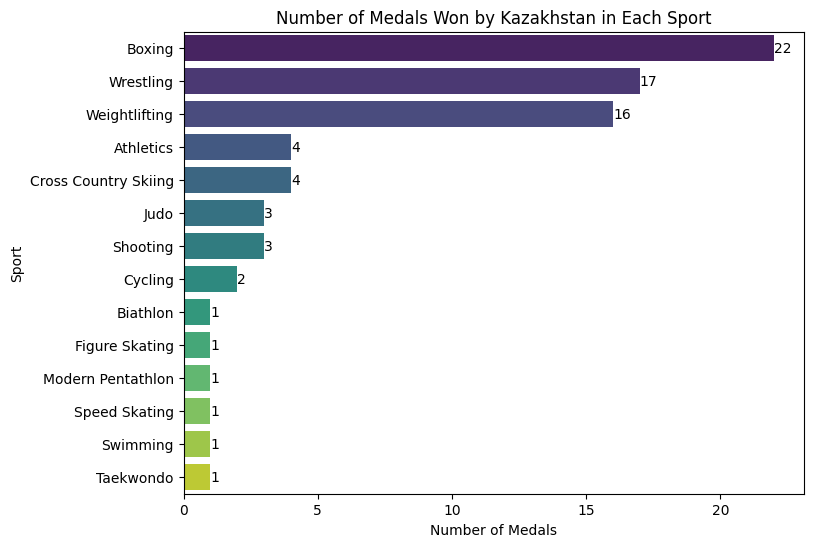

In [154]:
#Create a horizontal bar chart to show the number of medals won by Kazakhstan in different sports.

#Filter data for only Kazakhstan and where medals are won
kz_medals_data = kz_df[kz_df['Medal'].notnull()]

#Group by sport and count the number of medals won in each sport
medals_per_sport = kz_medals_data.groupby('Sport')['Medal'].count().reset_index()

#Sort the df by the number of medals won in descending order
medals_per_sport = medals_per_sport.sort_values(by='Medal', ascending=False)

#Create the horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='Medal', y='Sport', data=medals_per_sport, palette='viridis')

#Annotate
for index, value in enumerate(medals_per_sport['Medal']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title('Number of Medals Won by Kazakhstan in Each Sport')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')

plt.show()

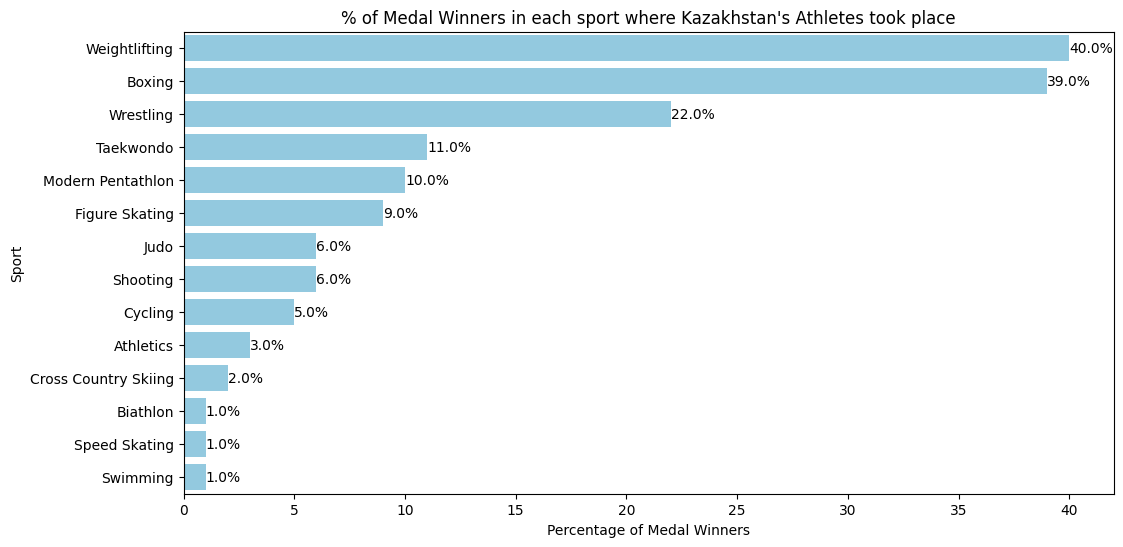

In [3]:
#Find the percentage of medal winners in each sport where Kazakhstan Athletes took place

# Group by sport and count the number of participants and medal winners in each sport
participants = kz_df.groupby('Sport').size().reset_index(name='Participants')
medal_winners = kz_df[kz_df['Medal'].notnull()].groupby('Sport').size().reset_index(name='Medal Winners')

# Merge the two dataframes on 'Sport' column
sport_stats = participants.merge(medal_winners, on='Sport', how='outer').fillna(0)

# Calculate the percentage of medal winners relative to participants
sport_stats['Medal Winners Percentage'] = round((sport_stats['Medal Winners'] * 100) / sport_stats['Participants'],0)

# Filter the DataFrame to include only rows where 'Medal Winners Percentage' is not equal to 0
sport_stats = sport_stats[sport_stats['Medal Winners Percentage'] != 0]
# sort the dataframe in descdenging order
sport_stats= sport_stats.sort_values(by='Medal Winners Percentage', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Medal Winners Percentage', y='Sport', data=sport_stats, color='skyblue')

#annotate with data values
for index, value in enumerate(sport_stats['Medal Winners Percentage']):
    plt.text(value, index, str(value)+'%', ha='left', va='center')

plt.title("% of Medal Winners in each sport where Kazakhstan's Athletes took place")
plt.xlabel('Percentage of Medal Winners')
plt.ylabel('Sport')
plt.show()


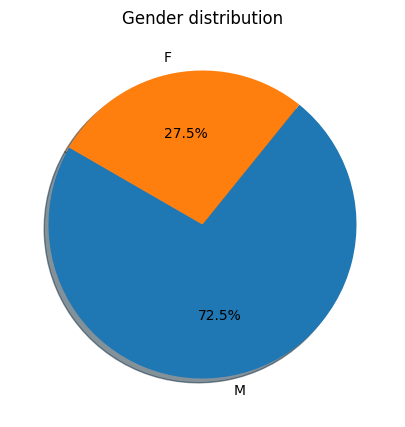

In [123]:
#Gender distribution in a pie chart
gender_counts = df.Sex.value_counts()
plt.figure(figsize=(6,5))
plt.title('Gender distribution')
plt.pie(gender_counts, autopct='%1.1f%%', labels=gender_counts.index, startangle=150, shadow=True)
plt.show()

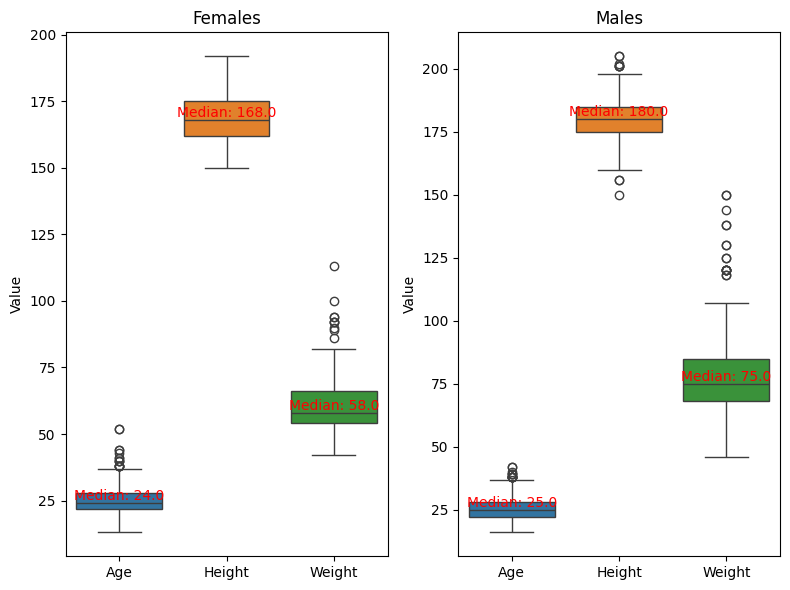

In [164]:
#Compare the age, height, and weight distributions between male and female Kazakhstani athletes.

#prepare the data
plt.figure(figsize=(8,6))

kz_df_F=kz_df[kz_df['Sex'] == 'F']
kz_df_M=kz_df[kz_df['Sex'] == 'M']

#Females
#dividing the plotting area,1 row and 2 columns
plt.subplot(1,2,1)

sns.boxplot(data=kz_df_F[['Age', 'Height', 'Weight']])
plt.title('Females')
plt.ylabel('Value')
for i in range(3):  # Iterate over the three features
    # Get the median value for the feature
    median_val = kz_df_F[[['Age', 'Height', 'Weight'][i]]].median().values[0]
    # Annotate the boxplot with the median value
    plt.text(i, median_val, f'Median: {median_val}', ha='center', va='bottom', color='red')

#Males
plt.subplot(1,2,2)
sns.boxplot(data=kz_df_M[['Age', 'Height', 'Weight']])
plt.title('Males')
plt.ylabel('Value')

for i in range(3): 
    median_val = kz_df_M[[['Age', 'Height', 'Weight'][i]]].median().values[0]
    plt.text(i, median_val, f'Median: {median_val}', ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()




However this EDA was very interesting and insightful, I must say I noticed that the dataset itself may not be completely accurate in tracking Kazakhstan's medalists
For example, Vladimir Mikhaylovich Smirnov has earned 7 olympic medals, however this dataset says he only has 4 medals.
So be aware, that there might be some inconsistancies in the dataset itself.

In [174]:
smirnov=kz_df[kz_df['Name']=='Vladimir Mikhaylovich Smirnov']
smirnov

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Region,Games,Year,Season,City,Sport,Event,Medal
223318,112152,Vladimir Mikhaylovich Smirnov,M,29.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Silver
223319,112152,Vladimir Mikhaylovich Smirnov,M,29.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
223320,112152,Vladimir Mikhaylovich Smirnov,M,29.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,Gold
223321,112152,Vladimir Mikhaylovich Smirnov,M,29.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,Silver
223322,112152,Vladimir Mikhaylovich Smirnov,M,33.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1998 Winter,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
223323,112152,Vladimir Mikhaylovich Smirnov,M,33.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1998 Winter,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
223324,112152,Vladimir Mikhaylovich Smirnov,M,33.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1998 Winter,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
223325,112152,Vladimir Mikhaylovich Smirnov,M,33.0,185.0,85.0,Kazakhstan,KAZ,Kazakhstan,1998 Winter,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,Bronze
